<a href="https://colab.research.google.com/github/trista-paul/AB-Demo/blob/master/TristaWeek5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
import seaborn as sns

In [6]:
#title of film
title = pd.read_table("https://datasets.imdbws.com/title.akas.tsv.gz")
title.dtypes

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


titleId            object
ordering            int64
title              object
region             object
language           object
types              object
attributes         object
isOriginalTitle    object
dtype: object

In [7]:
title.head()
#redundant values, high quantities of NaNs

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,2,Καρμενσίτα,GR,\N,\N,\N,0
2,tt0000001,3,Карменсита,RU,\N,\N,\N,0
3,tt0000001,4,Carmencita,US,\N,\N,\N,0
4,tt0000001,5,Carmencita,\N,\N,original,\N,1


In [8]:
title.isnull().sum() #...though they aren't encoded properly

titleId             0
ordering            0
title               0
region             55
language            0
types               0
attributes          0
isOriginalTitle     0
dtype: int64

In [9]:
#Cleaning - drop emptiest cols and cols that aren't useful to main df, then filter by original title
#Then rename and reorganize the title id to be compatible with further dfs
title = title.drop(columns= ['types', 'attributes', 'language', 'region', 'ordering'])
title = title[title['isOriginalTitle'] == 1]
title = title.rename(columns = {'titleId':'tconst'})
title = title.reset_index(drop=True)
title.head()

,tconst,title,isOriginalTitle
0,tt0000001,Carmencita,1
1,tt0000002,Le clown et ses chiens,1
2,tt0000003,Pauvre Pierrot,1
3,tt0000004,Un bon bock,1
4,tt0000005,Blacksmith Scene,1


In [10]:
title.shape

(50668, 3)

In [11]:
title = title.replace({r'\N': np.nan}) #oh my god
#titles with missing values are probably too obscure to matter, so I'll drop nan rows
title = title.dropna()
title.shape

(50668, 3)

In [12]:
#Attributes of film
basics = pd.read_table("https://datasets.imdbws.com/title.basics.tsv.gz")
basics.dtypes

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult            int64
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object

In [13]:
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [14]:
basics = basics.replace({r'\N': np.nan})
basics.isnull().sum() #primary and original title aren't needed anyway #I think it's valuable to keep genre

tconst                  0
titleType               0
primaryTitle            6
originalTitle         181
isAdult                 0
startYear          310580
endYear           5564893
runtimeMinutes    3908439
genres             441467
dtype: int64

In [15]:
basics.titleType.value_counts()

tvEpisode       3857247
short            664414
movie            510078
video            221482
tvSeries         159274
tvMovie          126138
tvMiniSeries      24690
videoGame         22880
tvSpecial         15772
tvShort            9025
Name: titleType, dtype: int64

In [16]:
basics = basics.drop(columns=['primaryTitle', 'originalTitle', 'endYear'])
basics = basics[basics['titleType']=='movie']
basics = basics.dropna()
basics.head()

,tconst,titleType,isAdult,startYear,runtimeMinutes,genres
8,tt0000009,movie,0,1894,45,Romance
145,tt0000147,movie,0,1897,20,"Documentary,News,Sport"
571,tt0000574,movie,0,1906,70,"Biography,Crime,Drama"
673,tt0000679,movie,0,1908,120,"Adventure,Fantasy"
1173,tt0001184,movie,0,1910,58,"Adventure,Drama"


In [17]:
#Directors and staff of film
director = pd.read_table("https://datasets.imdbws.com/name.basics.tsv.gz")
director.dtypes

nconst               object
primaryName          object
birthYear            object
deathYear            object
primaryProfession    object
knownForTitles       object
dtype: object

In [18]:
director.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0043044"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0117057,tt0038355,tt0071877"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,producer","tt0049189,tt0059956,tt0057345,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,writer,soundtrack","tt0077975,tt0078723,tt0072562,tt0080455"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0069467,tt0050986,tt0050976"


In [19]:
director.shape

(9117045, 6)

In [20]:
director = director.replace({r'\N': np.nan})
director.isnull().sum()

nconst                     0
primaryName                0
birthYear            8644227
deathYear            8953087
primaryProfession    1632885
knownForTitles       1212149
dtype: int64

In [21]:
director = director.drop(columns=['primaryProfession', 'deathYear',
                                  'knownForTitles', 'birthYear'])
director = director.rename(columns = {'nconst':'directors'})
director.head()

,directors,primaryName
0,nm0000001,Fred Astaire
1,nm0000002,Lauren Bacall
2,nm0000003,Brigitte Bardot
3,nm0000004,John Belushi
4,nm0000005,Ingmar Bergman


In [22]:
#critical rating of film
review = pd.read_table("https://datasets.imdbws.com/title.ratings.tsv.gz")
review.dtypes

tconst            object
averageRating    float64
numVotes           int64
dtype: object

In [23]:
review.head()

,tconst,averageRating,numVotes
0,tt0000001,5.8,1463
1,tt0000002,6.4,176
2,tt0000003,6.6,1079
3,tt0000004,6.5,105
4,tt0000005,6.2,1780


In [24]:
review = review.replace({r'\N': np.nan})
review.isnull().sum()

tconst           0
averageRating    0
numVotes         0
dtype: int64

In [25]:
#cleaning - drop rows with 1000 or less votes
review = review[review['numVotes']>= 1000]
review = review.reset_index(drop=True)
review.head()

,tconst,averageRating,numVotes
0,tt0000001,5.8,1463
1,tt0000003,6.6,1079
2,tt0000005,6.2,1780
3,tt0000008,5.6,1563
4,tt0000010,6.9,5217


In [26]:
#directors and writers of film by internal id
directorid =  pd.read_table("https://datasets.imdbws.com/title.crew.tsv.gz")
directorid.dtypes

tconst       object
directors    object
writers      object
dtype: object

In [27]:
directorid.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [28]:
directorid = directorid.replace({r'\N': np.nan})
directorid.isnull().sum()

tconst             0
directors    2366514
writers      2787645
dtype: int64

In [29]:
#cleaning - drop writers
directorid = directorid.drop(columns='writers').dropna()
directorid.head()

,tconst,directors
0,tt0000001,nm0005690
1,tt0000002,nm0721526
2,tt0000003,nm0721526
3,tt0000004,nm0721526
4,tt0000005,nm0005690


In [30]:
#merging the datasets
tconst = directorid.merge(review, on='tconst', how='inner')
tconst = tconst.merge(title, on='tconst', how='inner')
tconst = tconst.merge(basics, on='tconst', how='inner')
imdb = tconst.merge(director, on='directors', how='inner')
imdb = imdb.drop(columns=['isOriginalTitle','tconst','directors', 'titleType'])
imdb = imdb.rename(columns = {'primaryName':'director'})
imdb = imdb.sort_values('averageRating', ascending=True)
imdb = imdb.drop_duplicates()
imdb.head()

,averageRating,numVotes,title,isAdult,startYear,runtimeMinutes,genres,director
3139,1.3,3211,"Li hai le, wo de guo",0,2018,90,Documentary,Tie Wei
3072,1.5,1863,Namaste England,0,2018,141,"Comedy,Drama,Romance",Vipul Amrutlal Shah
996,1.7,1046,Ring of Terror,0,1961,71,"Drama,Horror",Clark L. Paylow
3126,1.8,6811,A Sniper's War,0,2018,83,Documentary,Olya Schechter
2630,1.9,11571,Going Overboard,0,1989,99,Comedy,Valerie Breiman


In [31]:
imdb.shape

(3183, 8)

In [32]:
imdb = imdb.replace({r'\N': np.nan})
imdb.isnull().sum()

averageRating     0
numVotes          0
title             0
isAdult           0
startYear         0
runtimeMinutes    0
genres            0
director          0
dtype: int64

# **What are the highest and lowest rated genres?**

In [33]:
#What are the highest and lowest rated genres?
genre = imdb[['genres', 'averageRating']]
genre.head()

,genres,averageRating
3139,Documentary,1.3
3072,"Comedy,Drama,Romance",1.5
996,"Drama,Horror",1.7
3126,Documentary,1.8
2630,Comedy,1.9


In [34]:
genre.groupby('genres').averageRating.nunique()
#oh no

genres
Action                         7
Action,Adventure               5
Action,Adventure,Animation     4
Action,Adventure,Biography     2
Action,Adventure,Comedy       29
Action,Adventure,Crime         8
Action,Adventure,Drama        21
Action,Adventure,Family        4
Action,Adventure,Fantasy      16
Action,Adventure,Horror        2
Action,Adventure,Mystery       1
Action,Adventure,Romance       2
Action,Adventure,Sci-Fi       15
Action,Adventure,Thriller     13
Action,Adventure,Western       1
Action,Animation,Comedy        3
Action,Animation,Crime         1
Action,Animation,Drama         1
Action,Animation,Fantasy       2
Action,Biography,Crime         1
Action,Biography,Drama         3
Action,Comedy                  9
Action,Comedy,Crime           25
Action,Comedy,Drama           13
Action,Comedy,Family           4
Action,Comedy,Fantasy          5
Action,Comedy,History          1
Action,Comedy,Horror           2
Action,Comedy,Mystery          3
Action,Comedy,Romance          6
   

In [35]:
movielist = []
moviemean = []

for genres in ['Horror', 'Action', 'Romance', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
              'Family', 'Fantasy', 'Sci-Fi', 'Mystery', 'Thriller', 'Western']:
  MoviesInGenre = genre[genre['genres'].str.contains(genres)]
  m = MoviesInGenre.averageRating.mean()
  movielist.append(genres)
  moviemean.append(m)
print(movielist)
print(moviemean)
Combined = pd.Series(data=moviemean, index=movielist).sort_values()
Combined

['Horror', 'Action', 'Romance', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Sci-Fi', 'Mystery', 'Thriller', 'Western']
[5.731554524361948, 6.138715953307385, 6.7303797468354425, 6.285238095238092, 7.194339622641512, 7.25441176470588, 6.396224832214758, 6.608943089430895, 6.959187279151939, 6.374566473988438, 6.146982758620688, 5.611627906976747, 6.649746192893395, 6.32102272727272, 6.831884057971015]


Sci-Fi       5.611628
Horror       5.731555
Action       6.138716
Fantasy      6.146983
Adventure    6.285238
Thriller     6.321023
Family       6.374566
Comedy       6.396225
Crime        6.608943
Mystery      6.649746
Romance      6.730380
Western      6.831884
Drama        6.959187
Animation    7.194340
Biography    7.254412
dtype: float64

In [36]:
#The 5 lowest rated genres
Combined.head()

Sci-Fi       5.611628
Horror       5.731555
Action       6.138716
Fantasy      6.146983
Adventure    6.285238
dtype: float64

In [37]:
#The 5 highest rated genres
Combined.tail()

Romance      6.730380
Western      6.831884
Drama        6.959187
Animation    7.194340
Biography    7.254412
dtype: float64

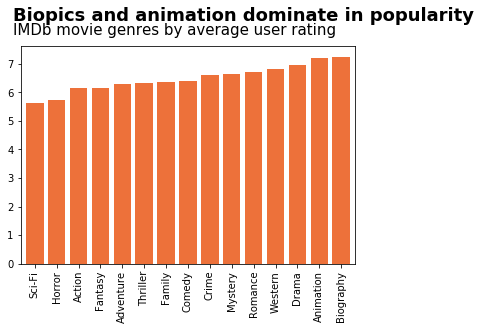

In [38]:
ax = Combined.plot.bar(color='#ED713A', width=0.8, legend=False);
ax.text(x=-1, y=8.5, s="Biopics and animation dominate in popularity", fontsize=18, fontweight='bold')
ax.text(x=-1, y=8, s='IMDb movie genres by average user rating', fontsize=15);

# **Who are the highest and lowest rated directors?**

In [39]:
#Who are the highest and lowest rated directors?
directors = imdb[['director', 'averageRating']]
directors.head()
directorCount = directors.director.value_counts()
#lots of directors with only 1 film with more than 1000 votes *cries in Errol Morris*
MoreThan5 = directorCount[directorCount.values >= 5]
MoreThan5 = MoreThan5.index.tolist()
#our conditional list - theatre films with more than 1000 votes from directors with 5 or more other movies with 1000 votes
directors = directors[directors.director.isin(MoreThan5)]
directors.head()

,director,averageRating
199,Roger Corman,2.9
200,Roger Corman,3.1
2139,Albert Pyun,3.1
204,Roger Corman,3.4
363,Bert I. Gordon,3.4


In [40]:
DirectorRating = directors.groupby(directors['director']).mean()
#DirectorRating = DirectorRating.sort_values(by = DirectorRating.averageRating )
type(DirectorRating) #dataframe
DirectorRating.reset_index()
DirectorRating = DirectorRating.sort_values(by = ['averageRating'])
#The Absolute Worst
DirectorRating.head()

,averageRating
director,
Bert I. Gordon,4.140000
Albert Pyun,5.214286
Bob Clark,5.300000
Sam Firstenberg,5.383333
Mark L. Lester,5.633333


In [41]:
#The Best
DirectorRating.tail()

,averageRating
director,
Yasujirô Ozu,8.085714
Akira Kurosawa,8.085714
Stanley Kubrick,8.120000
Satyajit Ray,8.166667
Masaki Kobayashi,8.520000


DataError: ignored

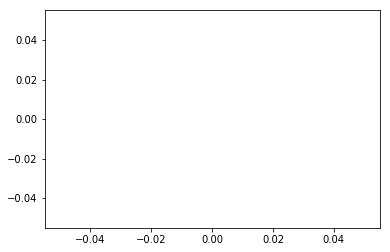

In [53]:
#how does runtime effect rating?
x = imdb[['runtimeMinutes', 'averageRating']]

ax = sns.lineplot(data=x, color='#0491D5', dashes=False, legend=False);
#ax.text(x=, y=, s="", fontsize=15, fontweight='bold')
#ax.text(x=, y=, s='Runtime of movies over user submitted rating', fontsize=12);
#ax.set(yticks=range());
#ax.set(xticks=range());
#plt.xlabel('');

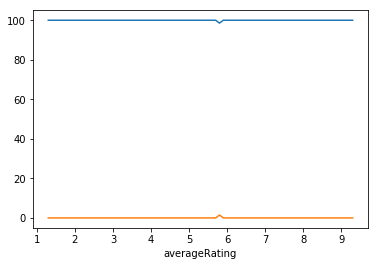

In [52]:
#do adult films have a different rating trend than non-adult films?
x = pd.crosstab(imdb['averageRating'], imdb['isAdult'], normalize='index')*100
ax = sns.lineplot(data=x, color=['#0491D5', '#FF2801'], hue='isAdult', dashes=False, legend=False);
#well darn
#for nearly all ratings 100% of examples are non-adult films

In [50]:
imdb['isAdult'].value_counts() #lol
#question cancelled

0    3182
1       1
Name: isAdult, dtype: int64

In [0]:
#What were the best and worst decades for film? *cries in 2018*
